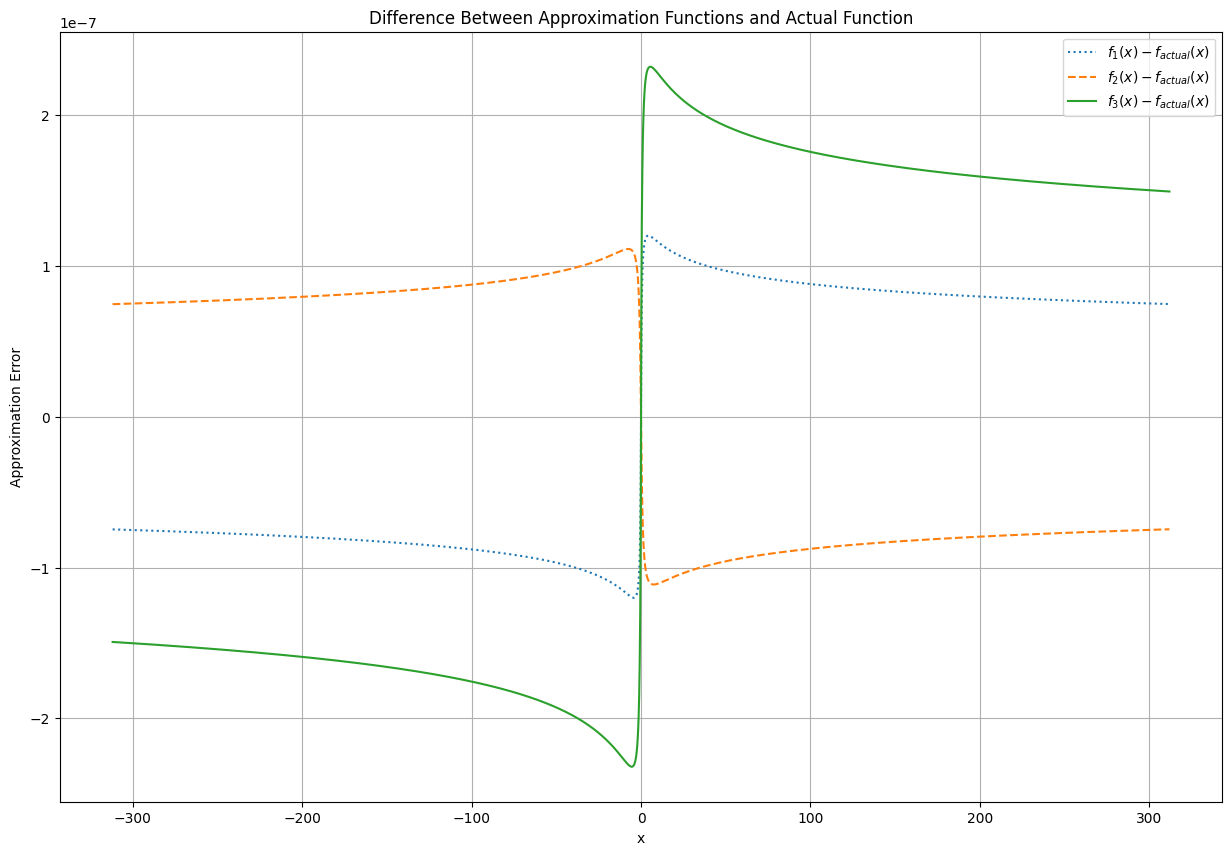

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852 * (0.001**1.852)

# Define the approximation functions
def f_1(x, p):
    return (0.001**1.852) * x * (np.abs(x) + 1000 * p)**0.852 - (0.002368316 * p * x) / (np.abs(x) + 1000 * p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + 1000 * p)**0.852 * (np.abs(x) * (0.001**1.852)) / (np.abs(x) + 852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.175255362 * p**2 * x) / (np.abs(x) + 1000 * p)**1.148

# Generate x values
x_values = np.linspace(-312, 312, 2000)
p = 1e-3  # Small positive value to avoid division issues

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = f_1_values - f_actual_values
diff_2 = f_2_values - f_actual_values
diff_3 = f_3_values - f_actual_values

# Plot the differences
plt.figure(figsize=(15, 10))
plt.plot(x_values, diff_1, label=r'$f_1(x) - f_{actual}(x)$', linestyle='dotted')
plt.plot(x_values, diff_2, label=r'$f_2(x) - f_{actual}(x)$', linestyle='dashed')
plt.plot(x_values, diff_3, label=r'$f_3(x) - f_{actual}(x)$', linestyle='solid')

# Use symmetric log scale for better visualization
#plt.xscale('symlog', lint hresh=1e-0)
#plt.yscale('symlog', linthresh=1e-0)

# Labels and legend
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

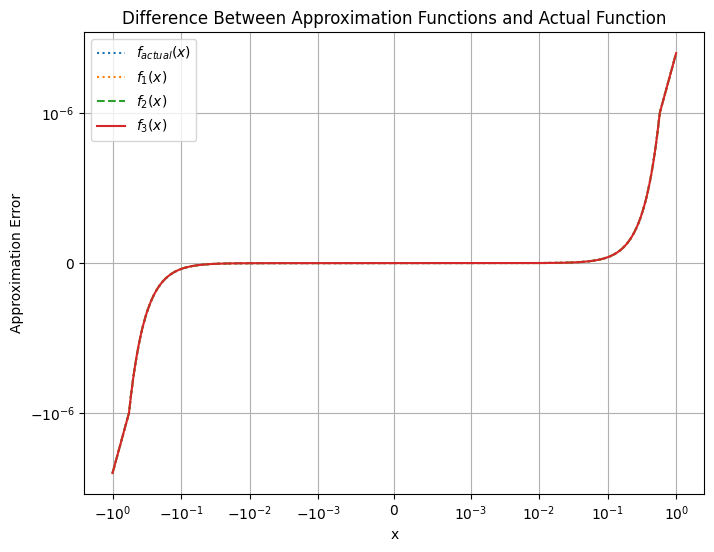

In [8]:

diff_1 = f_1_values  
diff_2 = f_2_values 
diff_3 = f_3_values


# Plot the differences
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_actual_values, label=r'$f_{actual}(x)$', linestyle='dotted')
plt.plot(x_values, diff_1, label=r'$f_1(x)$', linestyle='dotted')
plt.plot(x_values, diff_2, label=r'$f_2(x)$', linestyle='dashed')
plt.plot(x_values, diff_3, label=r'$f_3(x)$', linestyle='solid')

# Use symmetric log scale for better visualization
plt.xscale('symlog', linthresh=1e-3)
plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


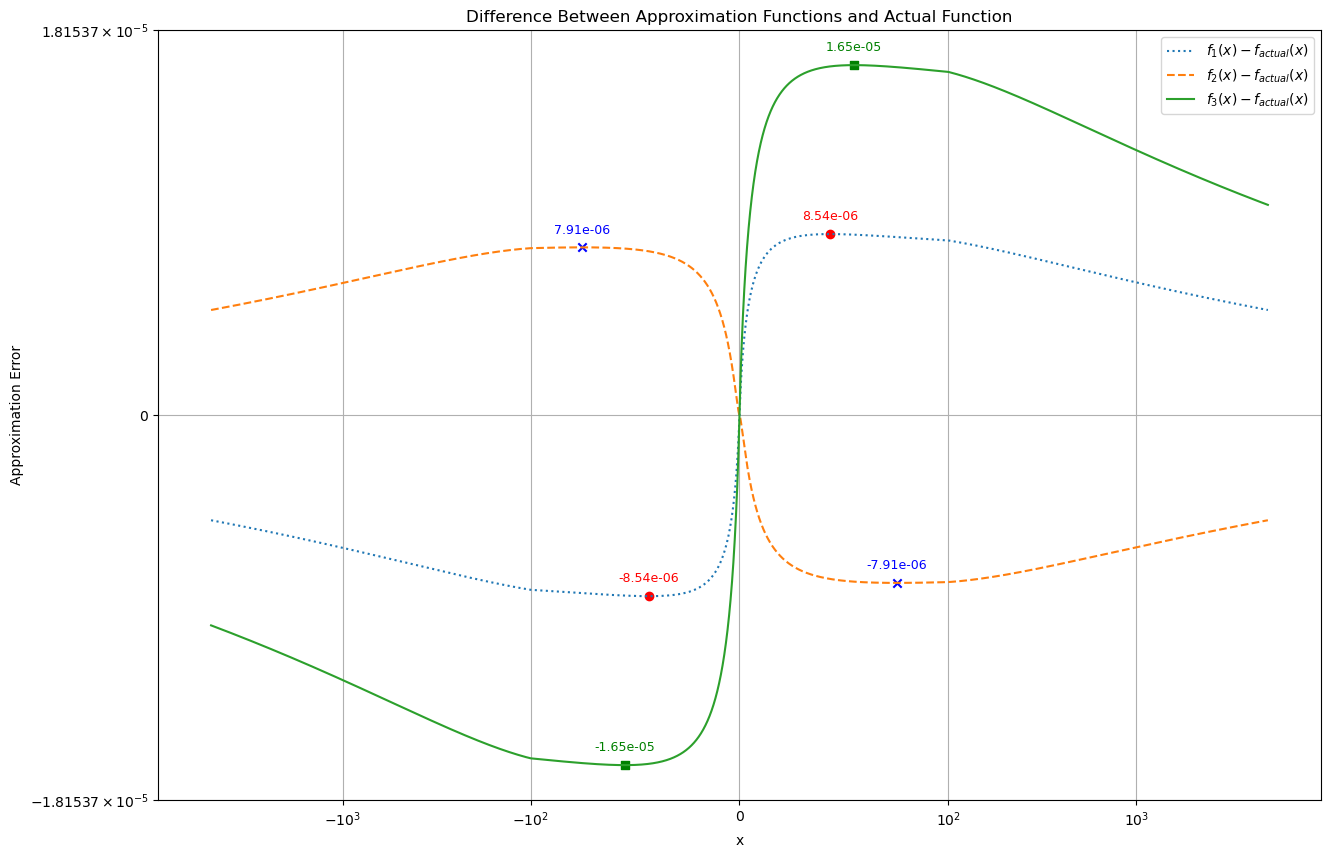

Critical points for f1 (x, diff): [(-43.37521687608478, -8.536918359163415e-06), (43.32521662608269, 8.536918200294404e-06)]
Critical points for f2 (x, diff): [(-75.47537737688708, 7.910985637449991e-06), (75.425377126885, -7.910985786684782e-06)]
Critical points for f3 (x, diff): [(-54.92527462637372, -1.6503356493582227e-05), (54.875274376371635, 1.6503355819949203e-05)]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852 * (0.001**1.852)

# Define the approximation functions
def f_1(x, p):
    return (0.001**1.852) * x * (np.abs(x) + 1000 * p)**0.852 - (0.002368316 * p * x) / (np.abs(x) + 1000 * p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + 1000 * p)**0.852 * (np.abs(x) * (0.001**1.852)) / (np.abs(x) + 852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.175255362 * p**2 * x) / (np.abs(x) + 1000 * p)**1.148

def f_4(x, p):
    return  (0.001**1.852) * x * (np.abs(x)+ 148*p) / (np.abs(x) + 1000 * p)**0.148

# Generate x values
x_values = np.linspace(-5000, 5000, 200000)
p = 1e-2  # Small positive value to avoid division issues

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = f_1_values - f_actual_values
diff_2 = f_2_values - f_actual_values
diff_3 = f_3_values - f_actual_values

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(15, 10))
plt.plot(x_values, diff_1, label=r'$f_1(x) - f_{actual}(x)$', linestyle='dotted')
plt.plot(x_values, diff_2, label=r'$f_2(x) - f_{actual}(x)$', linestyle='dashed')
plt.plot(x_values, diff_3, label=r'$f_3(x) - f_{actual}(x)$', linestyle='solid')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='red', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='red')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='blue', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='green', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='green')

# Use symmetric log scale for better visualization
plt.xscale('symlog', linthresh=1e+2)
plt.yscale('symlog', linthresh=1e-1)

# Labels and legend
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))


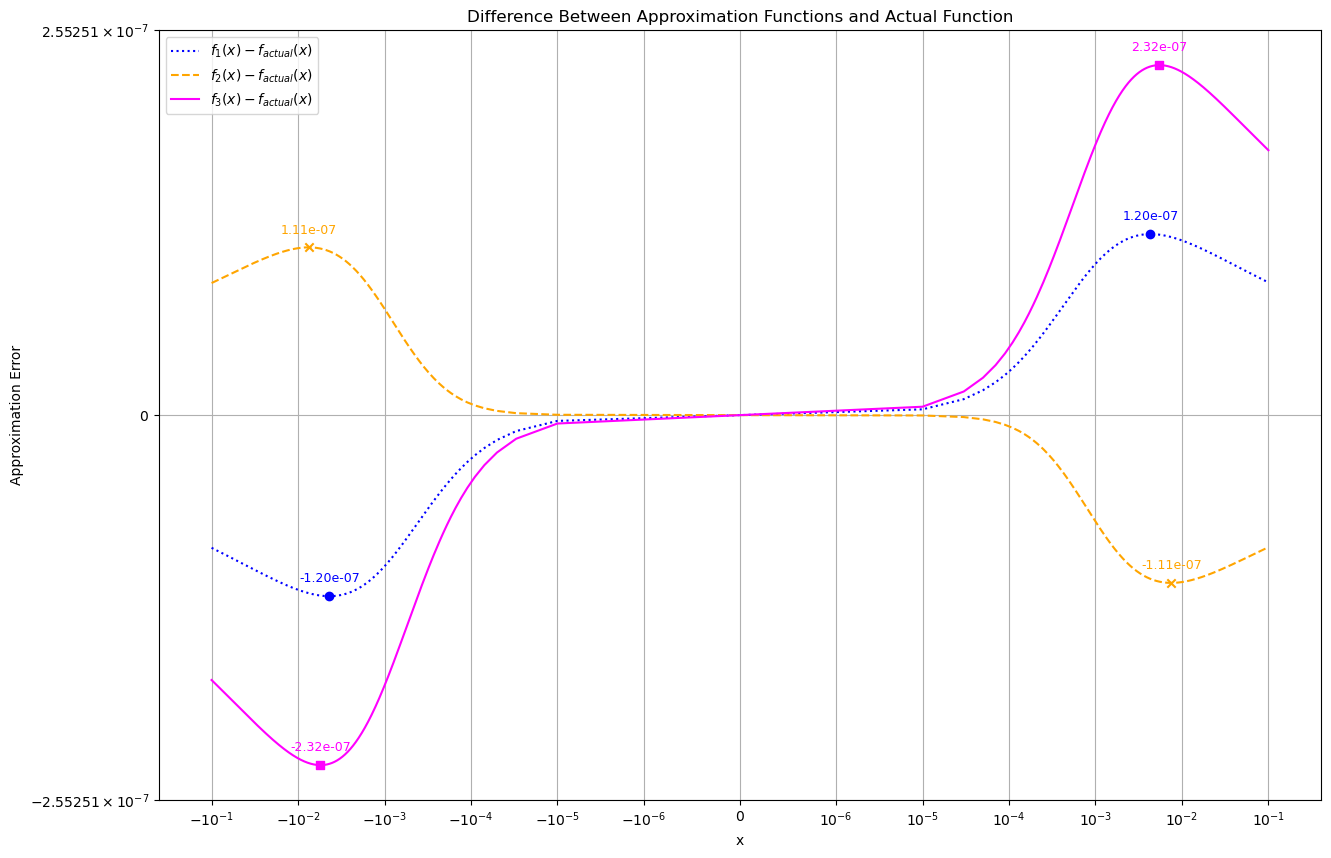

Critical points for f1 (x, diff): [(-0.004350435043504353, -1.2003404771745052e-07), (0.004330433043304327, 1.2003412033080682e-07)]
Critical points for f2 (x, diff): [(-0.007550755075507551, 1.1123221288613988e-07), (0.007530753075307525, -1.112321988090215e-07)]
Critical points for f3 (x, diff): [(-0.00551055105510552, -2.3204610494414275e-07), (0.005490549054905494, 2.320462662736293e-07)]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148

def f_4(x, p):
    return   x * (np.abs(x)+ 0.148*p) / (np.abs(x) + p)**0.148

# Generate x values
x_values = np.linspace(-0.1,0.1, 10000)
p = 1e-3  # Small positive value to avoid division issues

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
# diff_1 = (f_1_values - f_actual_values)/(np.abs(f_actual_values))
# diff_2 = (f_2_values - f_actual_values)/(np.abs(f_actual_values))
# diff_3 = (f_3_values - f_actual_values)/(np.abs(f_actual_values))

diff_1 = (f_1_values - f_actual_values)
diff_2 = (f_2_values - f_actual_values)
diff_3 = (f_3_values - f_actual_values)

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(15, 10))
plt.plot(x_values, diff_1, label=r'$f_1(x) - f_{actual}(x)$', linestyle='dotted',color='blue')
plt.plot(x_values, diff_2, label=r'$f_2(x) - f_{actual}(x)$', linestyle='dashed',color='orange')
plt.plot(x_values, diff_3, label=r'$f_3(x) - f_{actual}(x)$', linestyle='solid',color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Use symmetric log scale for better visualization
plt.xscale('symlog', linthresh=1e-6)
plt.yscale('symlog', linthresh=1e-1)

# Labels and legen.01id
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))


/tmp/ipykernel_458418/2313036976.py:33: RuntimeWarning: invalid value encountered in divide
  diff_1 = (f_1_values - f_actual_values)/(np.abs(f_actual_values))
/tmp/ipykernel_458418/2313036976.py:34: RuntimeWarning: invalid value encountered in divide
  diff_2 = (f_2_values - f_actual_values)/(np.abs(f_actual_values))
/tmp/ipykernel_458418/2313036976.py:35: RuntimeWarning: invalid value encountered in divide
  diff_3 = (f_3_values - f_actual_values)/(np.abs(f_actual_values))


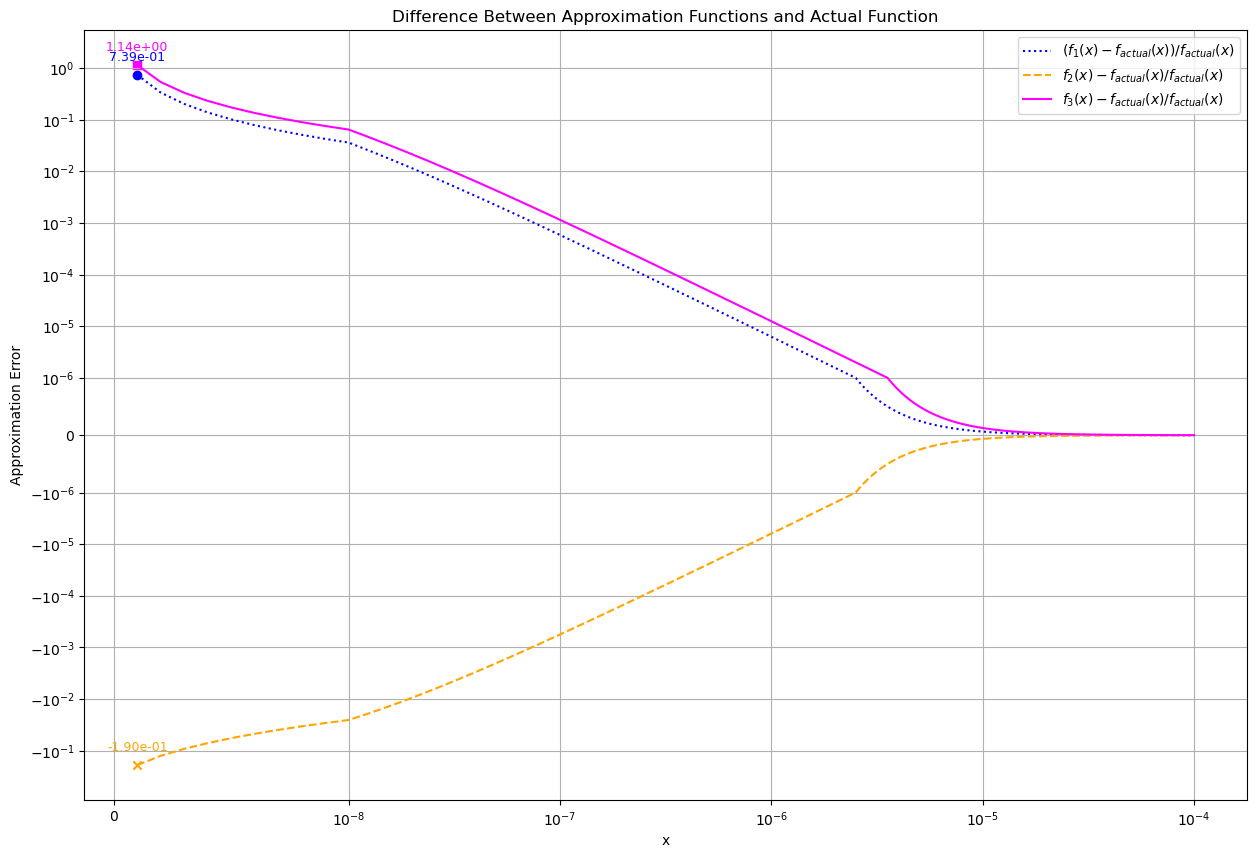

Critical points for f1 (x, diff): [(0.0, nan), (1.0000100001000011e-09, 0.739095999156344)]
Critical points for f2 (x, diff): [(0.0, nan), (1.0000100001000011e-09, -0.18972928592769686)]
Critical points for f3 (x, diff): [(0.0, nan), (1.0000100001000011e-09, 1.1410240884155982)]


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148

def f_4(x, p):
    return   x * (np.abs(x)+ 0.148*p) / (np.abs(x) + p)**0.148

# Generate x values
a = 0.0001
x_values = np.linspace(0,a, 100000)
p = 1e-8  # Small positive value to avoid division issues

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = (f_1_values - f_actual_values)/(np.abs(f_actual_values))
diff_2 = (f_2_values - f_actual_values)/(np.abs(f_actual_values))
diff_3 = (f_3_values - f_actual_values)/(np.abs(f_actual_values))

# diff_1 = (f_1_values - f_actual_values)
# diff_2 = (f_2_values - f_actual_values)
# diff_3 = (f_3_values - f_actual_values)

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(15, 10))
plt.plot(x_values, diff_1, label=r'$(f_1(x) - f_{actual}(x))/f_{actual}(x)$', linestyle='dotted',color='blue')
plt.plot(x_values, diff_2, label=r'$f_2(x) - f_{actual}(x)/f_{actual}(x)$', linestyle='dashed',color='orange')
plt.plot(x_values, diff_3, label=r'$f_3(x) - f_{actual}(x)/f_{actual}(x)$', linestyle='solid',color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Use symmetric log scale for better visualization
plt.xscale('symlog', linthresh=1e-8)
plt.yscale('symlog', linthresh=1e-6)

# Labels and legen.01id
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))

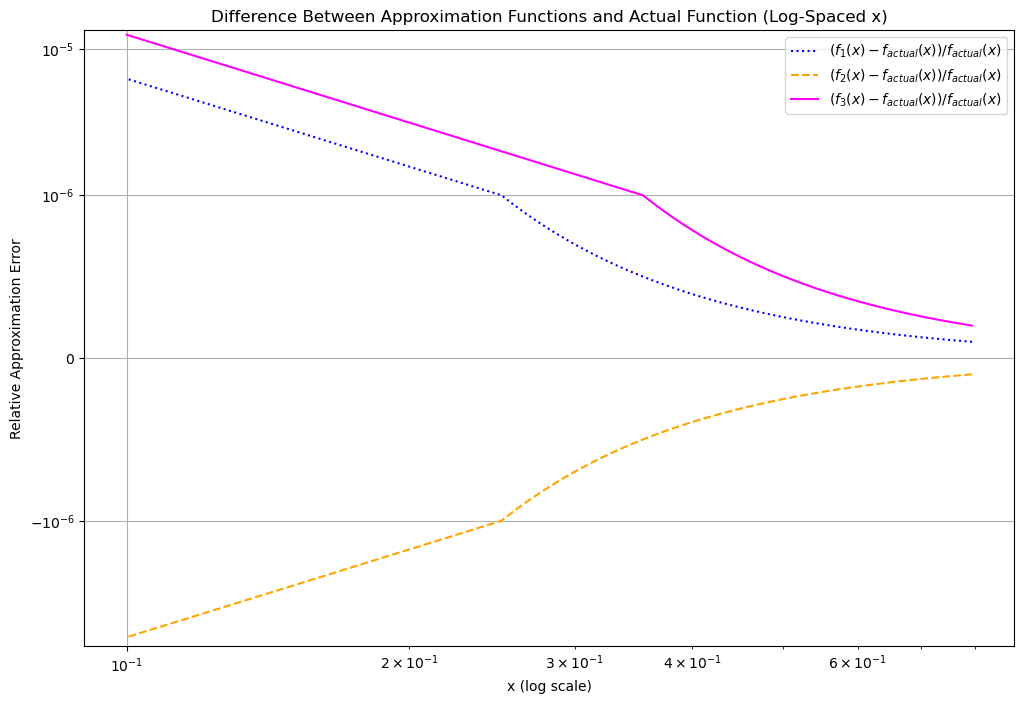

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148

# Generate x values (logarithmic scale)
x_values = np.logspace(-1e-1, -1, 1000)  # Log-spaced values from 10⁻⁶ to 10⁻²
p = 1e-3  # Small positive value

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = (f_1_values - f_actual_values) / np.abs(f_actual_values)
diff_2 = (f_2_values - f_actual_values) / np.abs(f_actual_values)
diff_3 = (f_3_values - f_actual_values) / np.abs(f_actual_values)

# Plot the differences
plt.figure(figsize=(12, 8))
plt.plot(x_values, diff_1, label=r'$(f_1(x) - f_{actual}(x))/f_{actual}(x)$', linestyle='dotted', color='blue')
plt.plot(x_values, diff_2, label=r'$(f_2(x) - f_{actual}(x))/f_{actual}(x)$', linestyle='dashed', color='orange')
plt.plot(x_values, diff_3, label=r'$(f_3(x) - f_{actual}(x))/f_{actual}(x)$', linestyle='solid', color='magenta')

# Log scale for x and y
plt.xscale('log')
plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x (log scale)')
plt.ylabel('Relative Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Log-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

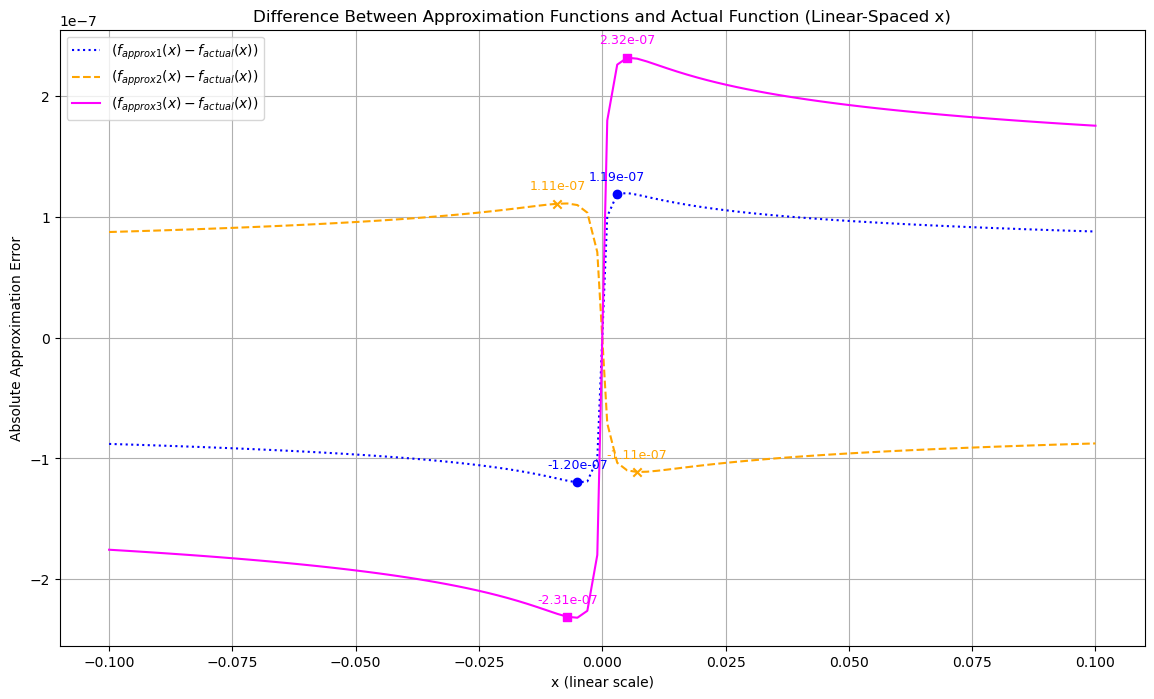

Critical points for f1 (x, diff): [(-0.005050505050505055, -1.198664771386997e-07), (0.003030303030303022, 1.190004984282166e-07)]
Critical points for f2 (x, diff): [(-0.009090909090909094, 1.1098592902662264e-07), (0.007070707070707061, -1.1120048818157079e-07)]
Critical points for f3 (x, diff): [(-0.007070707070707075, -2.311697998896758e-07), (0.005050505050505041, 2.3194162887767953e-07)]


In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    # return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148
    return x * (np.abs(x) + 0.148*p) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148
    # return ((x**3)*(x**2 + p)**0.426)/(x**2 + 0.426*p)

def f_4(x, p):
    # return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148 - 1.148*p*(np.abs(x)+p)**0.148)
    return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148)
    # return f_2(x, p) + (0.063048 * p**2 * x)*((np.abs(x) + p)**0.852) / ((np.abs(x) + p)**2 - 1.148*p*(np.abs(x)+0.852*p))
    # return ((x*((np.abs(x) + 0.574*p)**2) + 1.392524 * p**2 * x)*(np.abs(x) + p)**0.852) /((np.abs(x) + p)**2 - 1.148*p*(np.abs(x) + 0.852*p))

# Generate x values (linear spacing)
x_values = np.linspace(-1e-1, 1e-1, 100)  # Linear spacing from 10⁻⁶ to 10⁻²
p = 1e-3  # Small positive value

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = (f_1_values - f_actual_values) 
diff_2 = (f_2_values - f_actual_values) 
diff_3 = (f_3_values - f_actual_values) 

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(14, 8))
plt.plot(x_values, diff_1, label=r'$(f_{approx1}(x) - f_{actual}(x))$', linestyle='dotted', color='blue')
plt.plot(x_values, diff_2, label=r'$(f_{approx2}(x) - f_{actual}(x))$', linestyle='dashed', color='orange')
plt.plot(x_values, diff_3, label=r'$(f_{approx3}(x) - f_{actual}(x))$', linestyle='solid', color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Log scale for y, linear scale for x
# plt.xscale('linear')
# plt.xscale('symlog', linthresh=1e-3)
# plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x (linear scale)')
plt.ylabel('Absolute Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Linear-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))

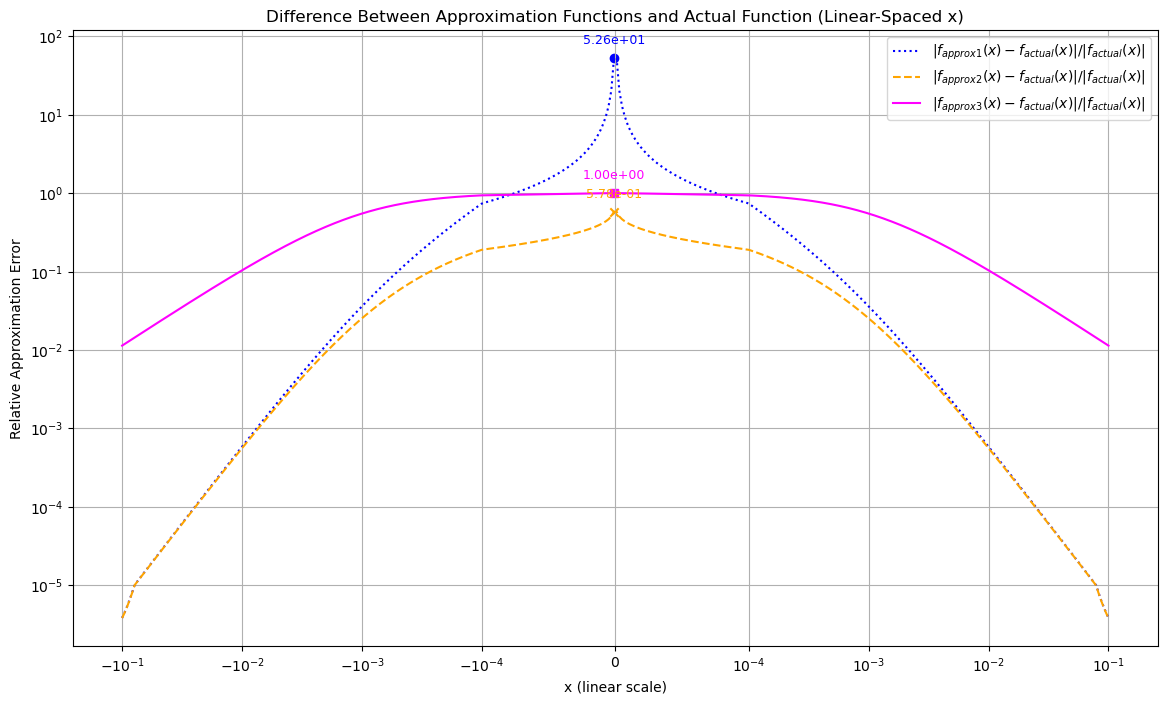

Critical points for f1 (x, diff): [(-1.0000100000850942e-06, 52.5942691872903)]
Critical points for f2 (x, diff): [(-1.0000100000850942e-06, 0.5778940789625833)]
Critical points for f3 (x, diff): [(-1.0000100000850942e-06, 0.999640659092889)]


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    # return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148
    return x * (np.abs(x) + 0.148*p) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    # return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148
    # return x**3 /((np.abs(x) + p)**1.148 - 1.148*p*(np.abs(x) + p)**0.148)
    return x**3 /((np.abs(x) + p)**1.148)

def f_4(x, p):
    # return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148 - 1.148*p*(np.abs(x)+p)**0.148)
    return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148)
    # return f_2(x, p) + (0.063048 * p**2 * x)*((np.abs(x) + p)**0.852) / ((np.abs(x) + p)**2 - 1.148*p*(np.abs(x)+0.852*p))
    # return f_2(x, p) + (0.063048 * p**2 * x)*((np.abs(x) + p)**0.852) / np.abs(x)*(np.abs(x) + 0.852*p)
    # return ((x*((np.abs(x) + 0.574*p)**2) + 1.392524 * p**2 * x)*(np.abs(x) + p)**0.852) /((np.abs(x) + p)**2 - 1.148*p*(np.abs(x) + 0.852*p))

# Generate x values (linear spacing)
x_values = np.linspace(-1e-1, 1e-1, 100000)  # Linear spacing from 10⁻⁶ to 10⁻²
p = 1e-3  # Small positive value

# x_values = np.linspace(-1e-2, 1e-2, 10000)  # Linear spacing from 10⁻⁶ to 10⁻²
# p = 1e-2  # Small positive value


# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = np.abs(f_1_values - f_actual_values) / np.abs(f_actual_values)
diff_2 = np.abs(f_2_values - f_actual_values) / np.abs(f_actual_values)
diff_3 = np.abs(f_3_values - f_actual_values) / np.abs(f_actual_values)

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(14, 8))
plt.plot(x_values, diff_1, label=r'$|f_{approx1}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='dotted', color='blue')
plt.plot(x_values, diff_2, label=r'$|f_{approx2}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='dashed', color='orange')
plt.plot(x_values, diff_3, label=r'$|f_{approx3}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='solid', color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Log scale for y, linear scale for x
# plt.xscale('linear')
plt.xscale('symlog', linthresh=1e-4)
plt.yscale('symlog', linthresh=1e-5)

# Labels and legend
plt.xlabel('x (linear scale)')
plt.ylabel('Relative Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Linear-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))

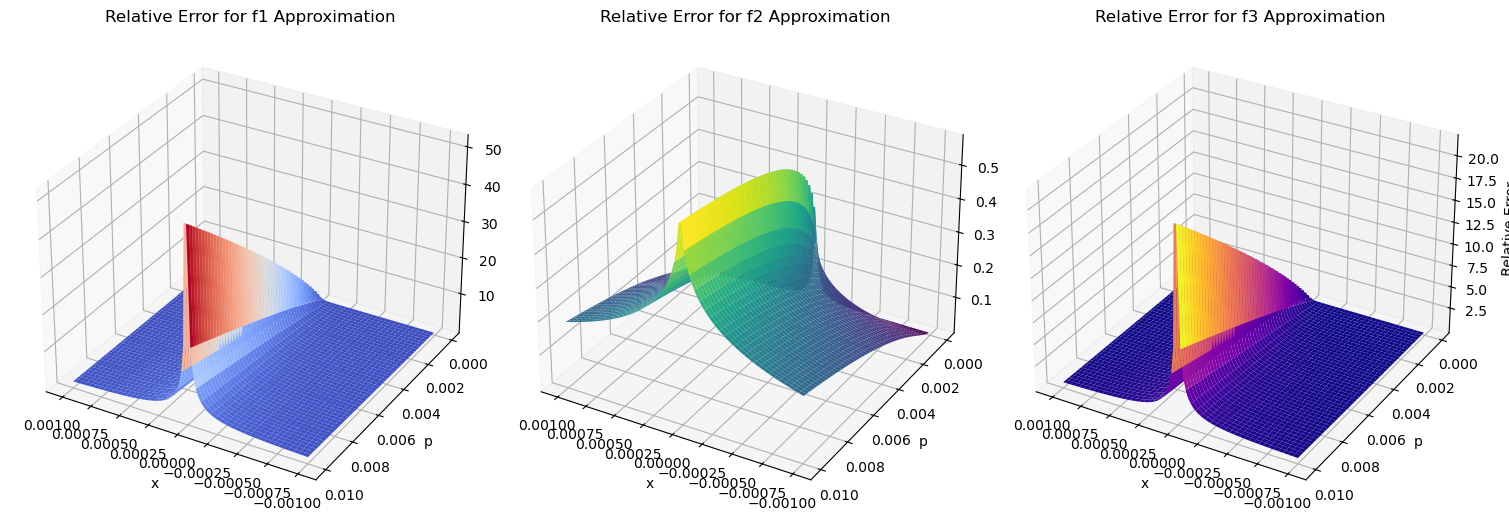

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    return x * (np.abs(x) + 0.148*p) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148


def f_4(x, p):
    return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148)

# Generate x and p values
x_values = np.linspace(-1e-3, 1e-3, 100)  # Linear spacing for x
p_values = np.linspace(1e-4, 1e-2, 50)  # Range of small values for p

# Create mesh grid for 3D plot
X, P = np.meshgrid(x_values, p_values)

# Compute function values over the grid
F_actual = f_actual(X)
F_1 = f_1(X, P)
F_2 = f_2(X, P)
F_3 = f_4(X, P)

# Compute relative differences
diff_1 = np.abs(F_1 - F_actual) / np.abs(F_actual)
diff_2 = np.abs(F_2 - F_actual) / np.abs(F_actual)
diff_3 = np.abs(F_3 - F_actual) / np.abs(F_actual)

# Create a figure for 3D plotting
fig = plt.figure(figsize=(15, 10))

# Plot f_1 error
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, P, diff_1, cmap='coolwarm', edgecolor='none')
ax1.set_title('Relative Error for f1 Approximation')
ax1.set_xlabel('x')
ax1.set_ylabel('p')
ax1.set_zlabel('Relative Error')
ax1.view_init(elev=30, azim=120)

# Plot f_2 error
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, P, diff_2, cmap='viridis', edgecolor='none')
ax2.set_title('Relative Error for f2 Approximation')
ax2.set_xlabel('x')
ax2.set_ylabel('p')
ax2.set_zlabel('Relative Error')
ax2.view_init(elev=30, azim=120)

# Plot f_3 error
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, P, diff_3, cmap='plasma', edgecolor='none')
ax3.set_title('Relative Error for f3 Approximation')
ax3.set_xlabel('x')
ax3.set_ylabel('p')
ax3.set_zlabel('Relative Error')
ax3.view_init(elev=30, azim=120)

# Show the 3D plots
plt.tight_layout()
plt.show()


In [10]:
def count_words(paragraph):
    words = paragraph.split()
    return len(words)

# Example paragraph
paragraph = """The water distribution networks (WDNs) are critical infrastructure systems in which
water is transported from sources to consumers. In water distribution networks, designing a reliable, efficient, and cost-effective system is crucial. The design of water distribution networks is challenging because of the nonlinear and non-convex nature of the pressure difference constraints. In the WDNs design, the aim is to determine optimal pipe diameters and flows that minimize the infrastructure costs while satisfying the demand requirements and hydraulic constraints within a fixed network topology. A key challenge in solving this optimization problem is obtaining primal feasible solutions, which proves to be more difficult than obtaining dual bounds using off-the-shelf nonlinear programming (NLP) solvers.
To calculate the pressure difference between nodes, we use the hazen-williams equation. However, a notable drawback of this equation arises when analyzing its differentiability at flow \( q_a = 0 \). While the first derivative exists, but the second derivative is discontinuous at zero, which can create challenges when applying derivative-based optimization methods such as the interior point method. Solvers are handle this nondifferentiability its own way. Some MINLP solvers (i.e. Bonmin, Minotaur) use Ipopt as default NLP solver. Ipopt is unable to handle such a nondifferentiable function, and it aborts the run immediately.
To overcome these issues, we developed a approximation of the hazen-williams equation, ensuring smoother differentiability and improved compatibility with optimization solvers. This approximation serves as an alternative to the hazen-williams equation for calculating the pressure difference between nodes. 
To design the cost-effective water distribution network, we developed a heuristic approach based on the acyclic flows in the water network. The aim of the heuristic is to identify the directed acyclic flow network that minimizes the design cost of the water distribution network. The heuristic begins by solving the original nonconvex optimization model using the nonlinear local solver Ipopt. The optimal solution is then used to derive the directed acyclic network structure. This approach systematically refines locally optimal solutions by creating the different directed acyclic flow networks and enhancing their local optimal solution to the approximate global optimum.
."""

# Count words
word_count = count_words(paragraph)
print("Total word count:", word_count)


Total word count: 344


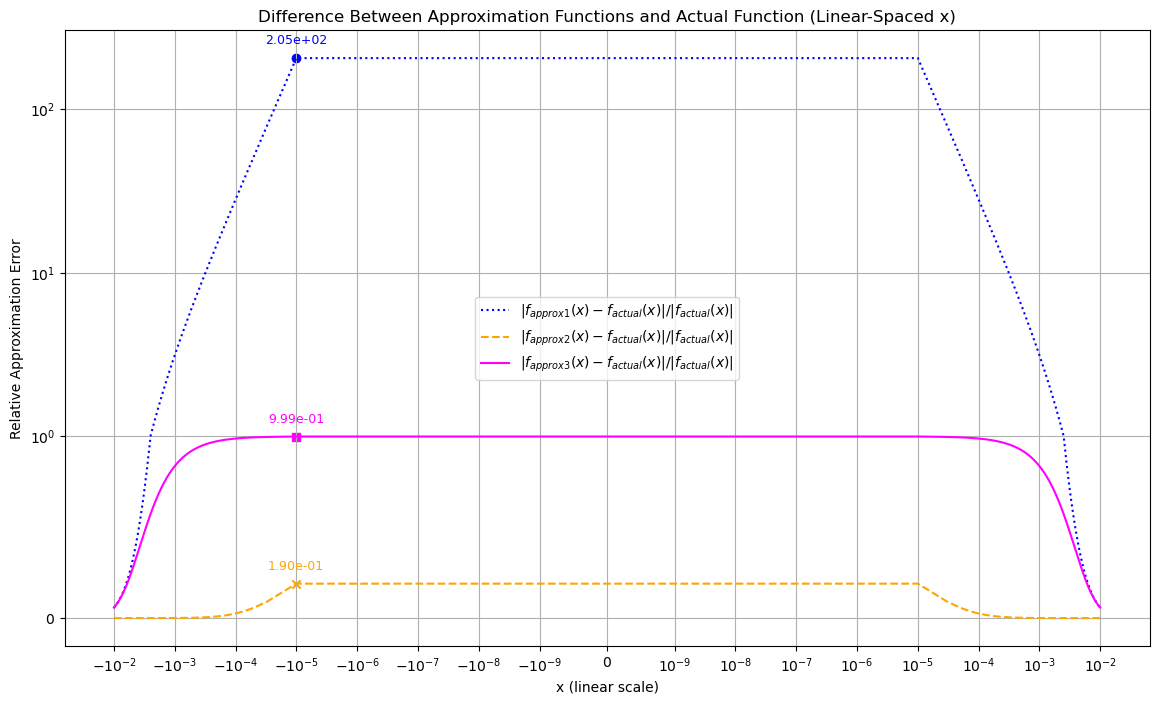

Critical points for f1 (x, diff): [(-1.0010010010009715e-05, 205.32041216005854)]
Critical points for f2 (x, diff): [(-1.0010010010009715e-05, 0.18963264984642128)]
Critical points for f3 (x, diff): [(-1.0010010010009715e-05, 0.9991545491126659)]


In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    # return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148
    # return x * (np.abs(x) + 0.148*p) / (np.abs(x) + p)**0.148
    return x * (x**2 + 0.574*p) / (x**2 + p)**0.574
    # return x*(x**2 + p)**0.426


def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)
    

def f_3(x, p):
    # return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148
    # return x**3 /((np.abs(x) + p)**1.148 - 1.148*p*(np.abs(x) + p)**0.148)
    # return x**3 /((np.abs(x) + p)**1.148)
    return ((x**3)*(x**2 + p)**0.426)/(x**2 + 0.426*p)

def f_4(x, p):
    # return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148 - 1.148*p*(np.abs(x)+p)**0.148)
    return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148)
    # return f_2(x, p) + (0.063048 * p**2 * x)*((np.abs(x) + p)**0.852) / ((np.abs(x) + p)**2 - 1.148*p*(np.abs(x)+0.852*p))
    # return f_2(x, p) + (0.063048 * p**2 * x)*((np.abs(x) + p)**0.852) / np.abs(x)*(np.abs(x) + 0.852*p)
    # return ((x*((np.abs(x) + 0.574*p)**2) + 1.392524 * p**2 * x)*(np.abs(x) + p)**0.852) /((np.abs(x) + p)**2 - 1.148*p*(np.abs(x) + 0.852*p))

# Generate x values (linear spacing)
x_values = np.linspace(-1e-2, 1e-2, 1000)  # Linear spacing from 10⁻⁶ to 10⁻²
p = 1e-4  # Small positive value

# x_values = np.linspace(-1e-2, 1e-2, 10000)  # Linear spacing from 10⁻⁶ to 10⁻²
# p = 1e-2  # Small positive value


# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = np.abs(f_1_values - f_actual_values) / np.abs(f_actual_values)
diff_2 = np.abs(f_2_values - f_actual_values) / np.abs(f_actual_values)
diff_3 = np.abs(f_3_values - f_actual_values) / np.abs(f_actual_values)

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(14, 8))
plt.plot(x_values, diff_1, label=r'$|f_{approx1}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='dotted', color='blue')
plt.plot(x_values, diff_2, label=r'$|f_{approx2}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='dashed', color='orange')
plt.plot(x_values, diff_3, label=r'$|f_{approx3}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='solid', color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Log scale for y, linear scale for x
# plt.xscale('linear')
plt.xscale('symlog', linthresh=1e-9)
plt.yscale('symlog', linthresh=1e-0)

# Labels and legend
plt.xlabel('x (linear scale)')
plt.ylabel('Relative Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Linear-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))

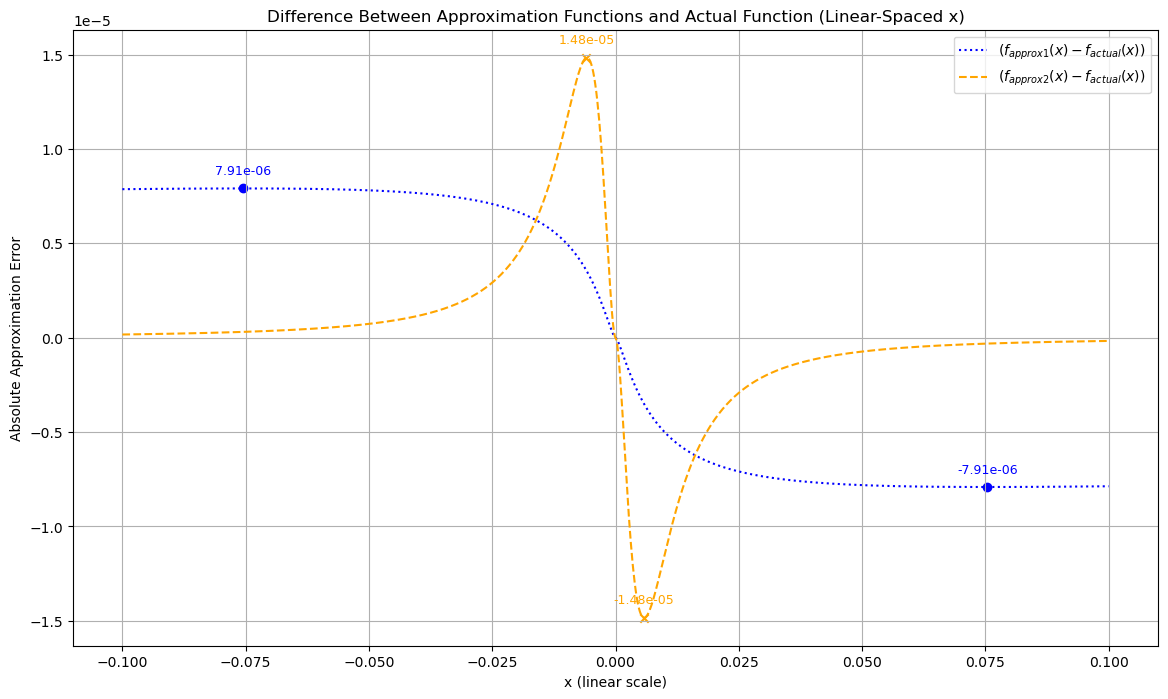

Critical points for f1 (x, diff): [(-0.07557557557557558, 7.910983941887897e-06), (0.07537537537537536, -7.910985470359691e-06)]
Critical points for f2 (x, diff): [(-0.005905905905905909, 1.4838221827625932e-05), (0.0057057057057057076, -1.4838647040575283e-05)]


In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    # return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_2(x, p):
    return ((x**3)*(x**2 + p**2)**0.426)/(x**2 + 0.426*p**2)

# Generate x values (linear spacing)
x_values = np.linspace(-1e-1, 1e-1, 1000)  # Linear spacing from 10⁻⁶ to 10⁻²
p = 1e-2  # Small positive value

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)

# Compute differences
diff_1 = (f_1_values - f_actual_values) 
diff_2 = (f_2_values - f_actual_values) 

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)

# Plot the differences
plt.figure(figsize=(14, 8))
plt.plot(x_values, diff_1, label=r'$(f_{approx1}(x) - f_{actual}(x))$', linestyle='dotted', color='blue')
plt.plot(x_values, diff_2, label=r'$(f_{approx2}(x) - f_{actual}(x))$', linestyle='dashed', color='orange')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

# Log scale for y, linear scale for x
# plt.xscale('linear')
# plt.xscale('symlog', linthresh=1e-2)
# plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x (linear scale)')
plt.ylabel('Absolute Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Linear-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
# print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))

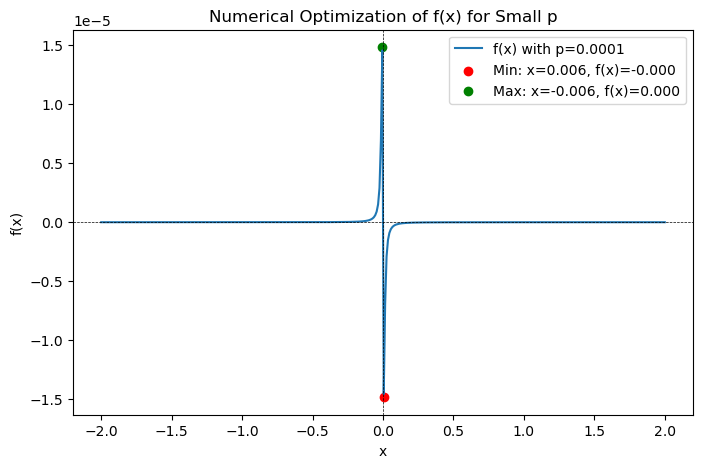

(0.005801678478540218,
 -1.4842299085492515e-05,
 -0.005801678484204765,
 1.484229908549507e-05)

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define function numerically
def f_numeric(x, p):
    return ((x**3) * (x**2 + p)**0.426) / (x**2 + 0.426*p) - x * abs(x)**0.852

# Define small p value
p_value = 0.0001

# Find min and max using numerical optimization
res_min = minimize_scalar(f_numeric, args=(p_value,), bounds=(-2, 2), method='bounded')
res_max = minimize_scalar(lambda x, p: -f_numeric(x, p), args=(p_value,), bounds=(-2, 2), method='bounded')

# Generate x values for plotting
x_vals = np.linspace(-2, 2, 400)
y_vals = [f_numeric(x, p_value) for x in x_vals]

# Plot function
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=f"f(x) with p={p_value}")
plt.scatter(res_min.x, res_min.fun, color='red', label=f"Min: x={res_min.x:.3f}, f(x)={res_min.fun:.3f}")
plt.scatter(res_max.x, -res_max.fun, color='green', label=f"Max: x={res_max.x:.3f}, f(x)={-res_max.fun:.3f}")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Numerical Optimization of f(x) for Small p")
plt.show()

# Return numerical results
res_min.x, res_min.fun, res_max.x, -res_max.fun

In [117]:
from sympy import symbols, Eq, solve
from scipy.optimize import fsolve
import numpy as np

def equation(x, p):
    return (1.852 * x**6 + 2.64095 * p * x**4 + 1.278 * p**2 * x**2 -
            1.852 * (x**2)**0.426 * (x**2 + p)**0.574 * (x**2 + 0.426 * p)**2)

p_value = 0.0001  # Example
x_initial_guess = 0.1  # A reasonable guess

x_solution = fsolve(equation, x_initial_guess, args=(p_value,))
print("Root:", x_solution)

Root: [0.00580227]


x_opt ≈ 0.58022687 * p^0.50000


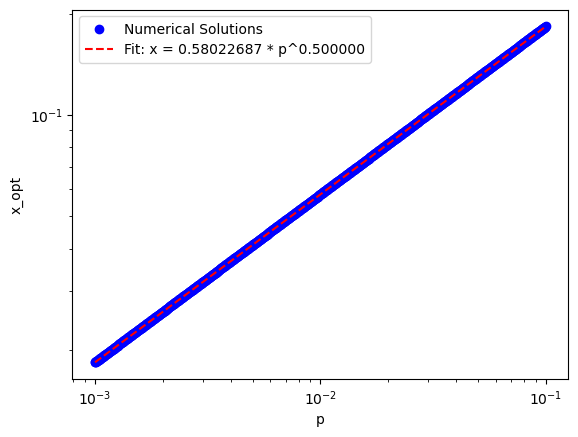

In [5]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the equation
def equation(x, p):
    return (1.852 * x**6 + 2.64095 * p * x**4 + 1.278 * p**2 * x**2 -
            1.852 * (x**2)**0.426 * (x**2 + p)**0.574 * (x**2 + 0.426 * p)**2)

# Generate data points for different p values
p_values = np.logspace(-3, -1, 1000)  # p from 0.001 to 0.1
x_opt_values = []

for p_test in p_values:
    x_guess = 0.1  # Initial guess
    x_sol = fsolve(equation, x_guess, args=(p_test,))
    x_opt_values.append(abs(x_sol[0]))  # Ensure positive root

# Perform log-log regression
log_p = np.log(p_values)
log_x_opt = np.log(x_opt_values)
slope, intercept = np.polyfit(log_p, log_x_opt, 1)

# Extract the power-law parameters
a = slope
C = np.exp(intercept)

# Display results
print(f"x_opt ≈ {C:.8f} * p^{a:.5f}")

# Plot the regression
plt.scatter(p_values, x_opt_values, label="Numerical Solutions", color="blue")
plt.plot(p_values, C * p_values**a, label=f"Fit: x = {C:.8f} * p^{a:.6f}", linestyle="dashed", color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("x_opt")
plt.legend()
plt.show()

In [223]:
import numpy as np
from scipy.optimize import bisect

def equation(x, p):
    return (1.852 * x**6 + 2.64095 * p * x**4 + 1.278 * p**2 * x**2 -
            1.852 * (x**2)**0.426 * (x**2 + p)**0.574 * (x**2 + 0.426 * p)**2)

p_values = [0.000001, 0.00001, 0.0001,0.001, 0.01, 0.1]
x_opt_values = []

for p_test in p_values:
    try:
        x_root = bisect(equation, 0.0004, 0.19, args=(p_test,))  
        x_opt_values.append((p_test, abs(x_root)))  
    except ValueError:
        x_opt_values.append((p_test, None))  
for p_val, x_val in x_opt_values:
    if x_val is not None:
        print(f"For p = {p_val}, x_opt ≈ {x_val:.6f}")
    else:
        print(f"For p = {p_val}, no root found in the given interval.")

For p = 1e-06, x_opt ≈ 0.000580
For p = 1e-05, x_opt ≈ 0.001835
For p = 0.0001, x_opt ≈ 0.005802
For p = 0.001, x_opt ≈ 0.018348
For p = 0.01, x_opt ≈ 0.058023
For p = 0.1, x_opt ≈ 0.183484


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


       p    x_opt  f(x_opt, p)
0.100000 0.183484 8.902279e-03
0.010000 0.058023 1.055604e-03
0.001000 0.018348 1.251703e-04
0.000100 0.005802 1.484230e-05
0.000010 0.001835 1.759953e-06
0.000001 0.099958 1.720453e-11


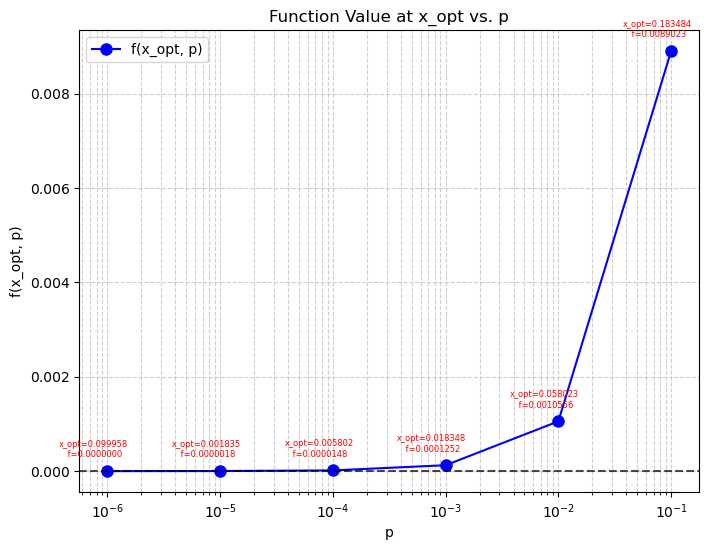

In [20]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd

# Define function numerically
def f_numeric(x, p):
    return ((x**3) * (x**2 + p)**0.426) / (x**2 + 0.426*p) - x * abs(x)**0.852

# Define the equation
def equation(x, p):
    return (1.852 * x**6 + 2.64095 * p * x**4 + 1.278 * p**2 * x**2 -
            1.852 * (x**2)**0.426 * (x**2 + p)**0.574 * (x**2 + 0.426 * p)**2)

# Given p values
p_values = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
x_opt_values = []
f_x_opt_values = []  # Store function values at x_opt

for p_test in p_values:
    x_guess = 0.1  # Initial guess
    x_sol = fsolve(equation, x_guess, args=(p_test,))
    x_opt = abs(x_sol[0])  # Ensure positive root
    x_opt_values.append(x_opt)
    
    # Compute the function value at the found x_opt
    f_x_opt = np.abs(f_numeric(x_opt, p_test))
    f_x_opt_values.append(f_x_opt)

# Create a DataFrame to display values in a table
df = pd.DataFrame({"p": p_values, "x_opt": x_opt_values, "f(x_opt, p)": f_x_opt_values})
print(df.to_string(index=False))  # Print table without index

# Plot function value at x_opt for given p values
plt.figure(figsize=(8, 6))
plt.plot(p_values, f_x_opt_values, marker="o", linestyle="-", color="blue", markersize=8, label="f(x_opt, p)")
plt.xscale("log")
plt.xlabel("p")
plt.ylabel("f(x_opt, p)")
plt.title("Function Value at x_opt vs. p")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Reference line at y=0
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()

# Annotate each point with x_opt and function value
for i in range(len(p_values)):
    plt.annotate(f"x_opt={x_opt_values[i]:.6f}\n f={f_x_opt_values[i]:.7f}",
                 (p_values[i], f_x_opt_values[i]),
                 textcoords="offset points", xytext=(-10,10), ha='center', fontsize=6, color='red')

plt.show()

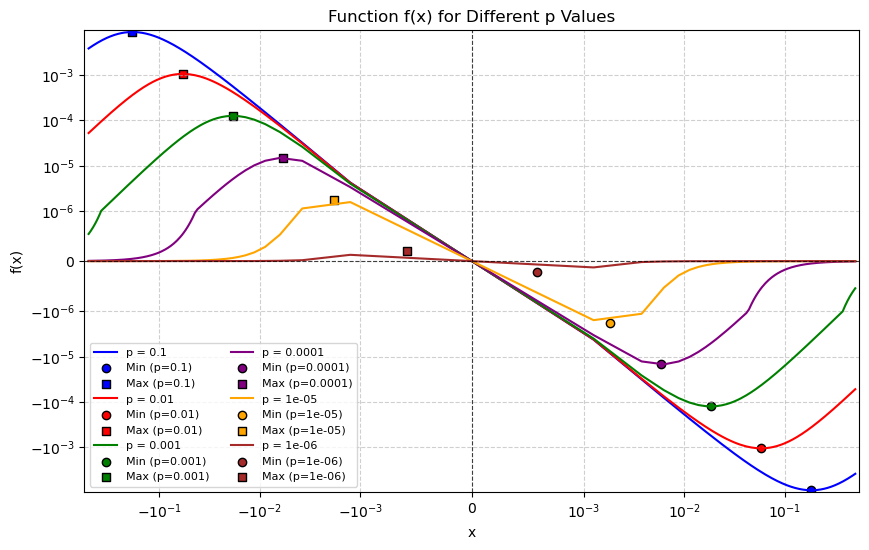

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define function numerically
def f_numeric(x, p):
    return ((x**3) * (x**2 + p)**0.426) / (x**2 + 0.426*p) - x * abs(x)**0.852

# Given p values
p_values = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
colors = ["blue", "red", "green", "purple", "orange", "brown"]  # Different colors for each p

# Set up figure
plt.figure(figsize=(10, 6))

# Loop over different p values
for i, p_value in enumerate(p_values):
    color = colors[i]
    
    # Find min and max using numerical optimization
    res_min = minimize_scalar(f_numeric, args=(p_value,), bounds=(-1, 1), method='bounded')
    res_max = minimize_scalar(lambda x, p: -f_numeric(x, p), args=(p_value,), bounds=(-1, 1), method='bounded')

    # Generate x values for plotting
    x_vals = np.linspace(-0.5, 0.5, 400)
    y_vals = [f_numeric(x, p_value) for x in x_vals]

    # Plot function for current p
    plt.plot(x_vals, y_vals, label=f"p = {p_value}", color=color, linewidth=1.5)
    
    # Mark min and max points
    plt.scatter(res_min.x, res_min.fun, color=color, marker="o", edgecolors="black", label=f"Min (p={p_value})")
    plt.scatter(res_max.x, -res_max.fun, color=color, marker="s", edgecolors="black", label=f"Max (p={p_value})")

# Reference lines
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
plt.xscale('symlog', linthresh=1e-3)
plt.yscale('symlog', linthresh=1e-6)

# Formatting
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function f(x) for Different p Values")
plt.legend(loc="lower left", fontsize=8, ncol=2)  # Smaller legend, arranged in 2 columns
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


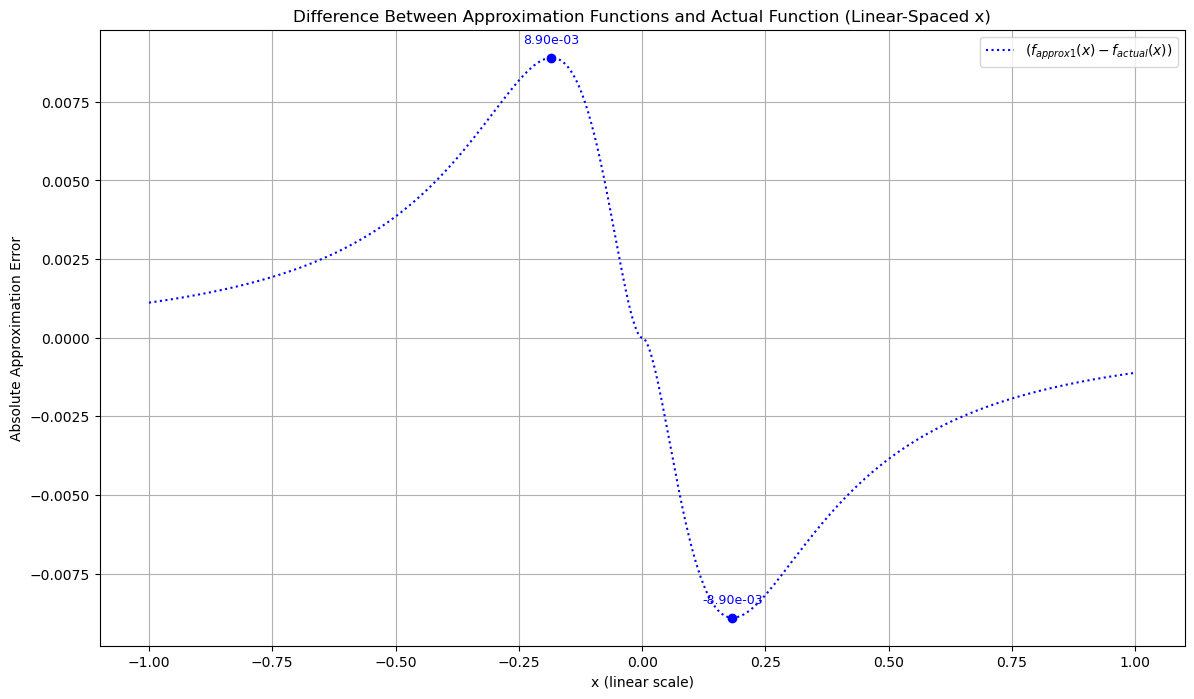

Critical points for f1 (x, diff): [(-0.18518518518518523, 0.008901614214998403), (0.18318318318318316, -0.008902257706320645)]


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

def f_1(x, p):
    return ((x**3)*(x**2 + p)**0.426)/(x**2 + 0.426*p)

# Generate x values (linear spacing)
x_values = np.linspace(-1e-0, 1e-0, 1000)  # Linear spacing from 10⁻⁶ to 10⁻²
p = 1e-1  # Small positive value

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)

# Compute differences
diff_1 = (f_1_values - f_actual_values) 

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)

# Plot the differences
plt.figure(figsize=(14, 8))
plt.plot(x_values, diff_1, label=r'$(f_{approx1}(x) - f_{actual}(x))$', linestyle='dotted', color='blue')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')


# Log scale for y, linear scale for x
# plt.xscale('linear')
# plt.xscale('symlog', linthresh=1e-2)
# plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x (linear scale)')
plt.ylabel('Absolute Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Linear-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p:1e-06, x*:0.0005802268675529994, Min Absolute Error:-2.0868978065132016e-07
p:1e-06, x*:-0.0005802268675529988, Max Absolute Error:2.0868978065132016e-07



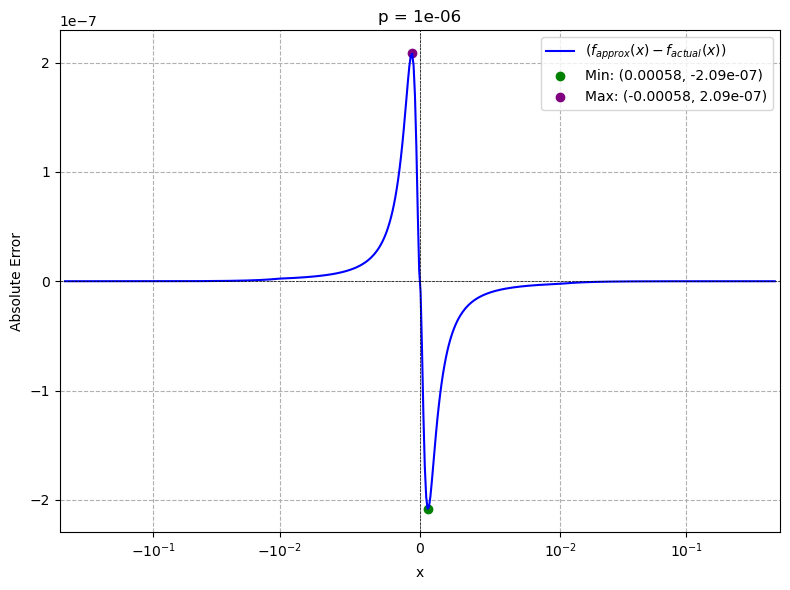

In [135]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation function
def f_1(x, p):
    return ((x**3) * (x**2 + p)**0.426) / (x**2 + 0.426 * p)

# Define the derivative equation (critical points occur where this equals zero)
def equation(x, p):
    return (1.852 * x**6 + 2.64095 * p * x**4 + 1.278 * p**2 * x**2 -
            1.852 * (x**2)**0.426 * (x**2 + p)**0.574 * (x**2 + 0.426 * p)**2)

# Define different values of p
p_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

p = 1e-6

# Generate x values
x_values = np.linspace(-0.5, 0.5, 10000)  # High resolution

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)

# Compute differences
diff_1 = f_1_values - f_actual_values  # Error function

# Find exact critical points using fsolve
x_guess = np.linspace(-0.5, 0.5, 10)  # Multiple guesses
critical_x1 = []
critical_y1 = []

for x0 in x_guess:
    sol = fsolve(equation, x0, args=(p,))
    sol = sol[np.isreal(sol)].real  # Keep only real solutions
    for x_sol in sol:
        if -1 <= x_sol <= 1 and not any(np.isclose(x_sol, critical_x1, atol=1e-6)):
            critical_x1.append(x_sol)
            critical_y1.append(f_1(x_sol, p) - f_actual(x_sol))  # Compute error at critical points
            # print(f"p:{p}, x*:{x_sol}, Absolute Error:{f_1(x_sol, p) - f_actual(x_sol)}")

# Ensure critical points exist before finding min/max
if len(critical_y1) > 0:
    min_index = np.argmin(critical_y1)
    max_index = np.argmax(critical_y1)
    min_x, min_y = critical_x1[min_index], critical_y1[min_index]
    max_x, max_y = critical_x1[max_index], critical_y1[max_index]
    print(f"p:{p}, x*:{min_x}, Min Absolute Error:{min_y}")
    print(f"p:{p}, x*:{max_x}, Max Absolute Error:{max_y}\n")
else:
    min_x = max_x = min_y = max_y = None
    
plt.figure(figsize=(8, 6))
plt.plot(x_values, diff_1, label=r'$(f_{approx}(x) - f_{actual}(x))$', linestyle='solid', color='blue')

# Highlight min/max points if they exist
if min_x is not None and max_x is not None:
    plt.scatter(min_x, min_y, color='green', marker='o', label=f'Min: ({min_x:.5f}, {min_y:.2e})')
    plt.scatter(max_x, max_y, color='purple', marker='o', label=f'Max: ({max_x:.5f}, {max_y:.2e})')

# Add grid, reference lines, and labels
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.xscale('symlog', linthresh=1e-2)
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title(f'p = {p}')
plt.legend()
plt.grid(True, linestyle="--", alpha=1)

plt.tight_layout()
plt.show()

p:0.1, x*:0.18348384610923238, Min Absolute Error:-0.008902278620904987
p:0.1, x*:-0.1834838461092321, Max Absolute Error:0.008902278620904994

p:0.01, x*:0.05802268675529976, Min Absolute Error:-0.0010556043776145793
p:0.01, x*:-0.058022686755299785, Max Absolute Error:0.0010556043776145784

p:0.001, x*:0.018348384610923595, Min Absolute Error:-0.0001251702681403814
p:0.001, x*:-0.018348384610923245, Max Absolute Error:0.00012517026814038134

p:0.0001, x*:0.005802268675529985, Min Absolute Error:-1.4842299216056782e-05
p:0.0001, x*:-0.005802268675529984, Max Absolute Error:1.4842299216056776e-05

p:1e-05, x*:0.0018348384610923287, Min Absolute Error:-1.7599534561346052e-06
p:1e-05, x*:-0.001834838461092322, Max Absolute Error:1.7599534561346077e-06



/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p:1e-06, x*:0.0005802268675529994, Min Absolute Error:-2.0868978065132016e-07
p:1e-06, x*:-0.0005802268675529988, Max Absolute Error:2.0868978065132016e-07



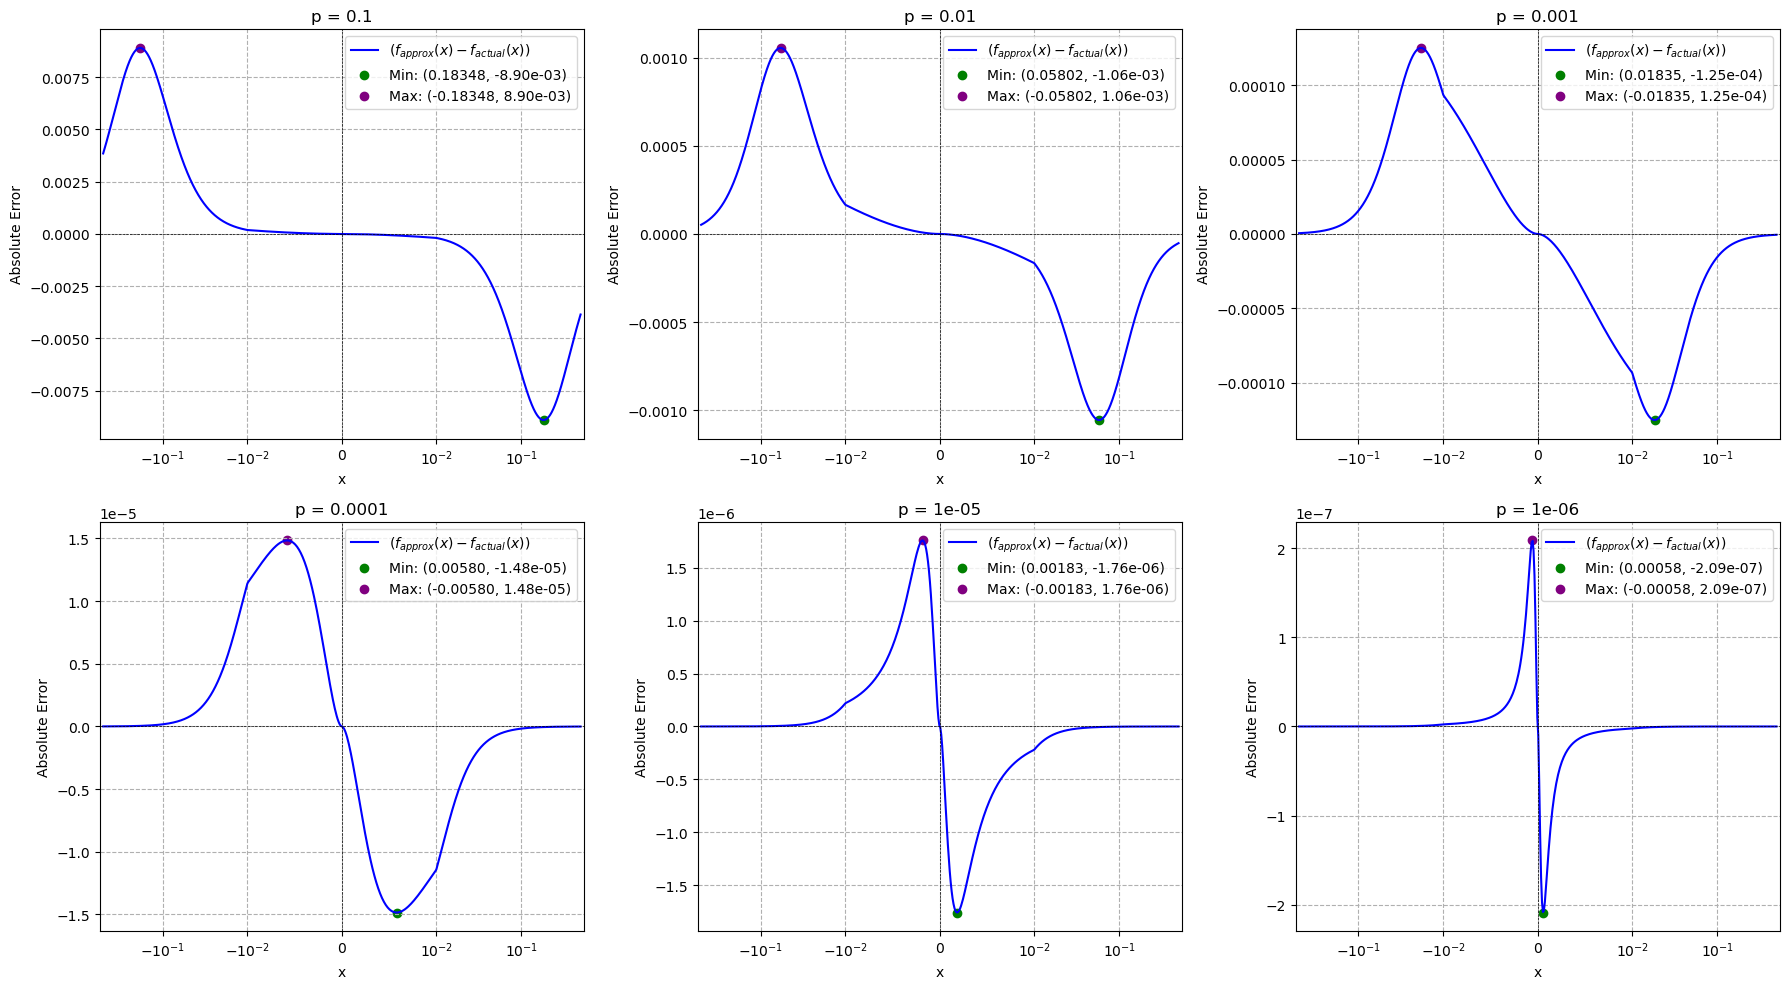

In [124]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation function
def f_1(x, p):
    return ((x**3) * (x**2 + p)**0.426) / (x**2 + 0.426 * p)

# Define the derivative equation (critical points occur where this equals zero)
def equation(x, p):
    return (1.852 * x**6 + 2.64095 * p * x**4 + 1.278 * p**2 * x**2 -
            1.852 * (x**2)**0.426 * (x**2 + p)**0.574 * (x**2 + 0.426 * p)**2)

# Define different values of p
p_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

# Generate x values
x_values = np.linspace(-0.5, 0.5, 10000)  # High resolution

# Create plots for different p values
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, p in enumerate(p_values):
    row, col = divmod(i, 3)
    
    # Compute function values
    f_actual_values = f_actual(x_values)
    f_1_values = f_1(x_values, p)

    # Compute differences
    diff_1 = f_1_values - f_actual_values  # Error function

    # Find exact critical points using fsolve
    x_guess = np.linspace(-0.5, 0.5, 10)  # Multiple guesses
    critical_x1 = []
    critical_y1 = []

    for x0 in x_guess:
        sol = fsolve(equation, x0, args=(p,))
        sol = sol[np.isreal(sol)].real  # Keep only real solutions
        for x_sol in sol:
            if -1 <= x_sol <= 1 and not any(np.isclose(x_sol, critical_x1, atol=1e-6)):
                critical_x1.append(x_sol)
                critical_y1.append(f_1(x_sol, p) - f_actual(x_sol))  # Compute error at critical points
                # print(f"p:{p}, x*:{x_sol}, Absolute Error:{f_1(x_sol, p) - f_actual(x_sol)}")

    # Ensure critical points exist before finding min/max
    if len(critical_y1) > 0:
        min_index = np.argmin(critical_y1)
        max_index = np.argmax(critical_y1)
        min_x, min_y = critical_x1[min_index], critical_y1[min_index]
        max_x, max_y = critical_x1[max_index], critical_y1[max_index]
        print(f"p:{p}, x*:{min_x}, Min Absolute Error:{min_y}")
        print(f"p:{p}, x*:{max_x}, Max Absolute Error:{max_y}\n")
    else:
        min_x = max_x = min_y = max_y = None

    ax = axes[row, col]
    ax.plot(x_values, diff_1, label=r'$(f_{approx}(x) - f_{actual}(x))$', linestyle='solid', color='blue')

    # Highlight min/max points if they exist
    if min_x is not None and max_x is not None:
        ax.scatter(min_x, min_y, color='green', marker='o', label=f'Min: ({min_x:.5f}, {min_y:.2e})')
        ax.scatter(max_x, max_y, color='purple', marker='o', label=f'Max: ({max_x:.5f}, {max_y:.2e})')

    # Add grid, reference lines, and labels
    ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.5)
    ax.set_xscale('symlog', linthresh=1e-2)
    ax.set_xlabel('x')
    ax.set_ylabel('Absolute Error')
    ax.set_title(f'p = {p}')
    ax.legend()
    ax.grid(True, linestyle="--", alpha=1)

plt.tight_layout()
plt.show()